In [4]:
import numpy as np
import pandas as pd
import os

In [7]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')

# Now you can access the file using the filename
dataset_filename = list(uploaded.keys())[0]

# Print the content of the file (optional)
with open(dataset_filename, 'r', encoding='utf-8', errors='ignore') as file:
    content = file.read()
    print(content)


Saving spam.csv to spam (2).csv
Uploaded file: spam (2).csv
v1,v2,,,
ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,
ham,Ok lar... Joking wif u oni...,,,
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,
ham,U dun say so early hor... U c already then say...,,,
ham,"Nah I don't think he goes to usf, he lives around here though",,,
spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, 1.50 to rcv",,,
ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,
ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,
spam,WINNER!! As a valued network customer you have been selected to re

In [10]:
import pandas as pd
filename = 'spam.csv'
df = pd.read_csv(filename, encoding='ISO-8859-1')
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [11]:
df.shape

(5572, 5)

In [12]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [14]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3058,ham,"Dear all, as we know &lt;#&gt; th is the &lt...",NaN,NaN,NaN
3029,ham,"Also sir, i sent you an email about how to log...",NaN,NaN,NaN
2746,ham,K da:)how many page you want?,NaN,NaN,NaN
4916,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN


In [15]:
import re
import nltk

In [16]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [17]:
ps=PorterStemmer()
corpus=[]

In [20]:
len(df['v2'])

5572

In [25]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# Download the 'stopwords' resource
nltk.download('stopwords')

ps = PorterStemmer()
corpus = []

for i in range(0, len(df['v2'])):
    review = re.sub('[^a-zA-Z]', ' ', df['v2'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
cv=CountVectorizer(max_features=2500)
X=cv.fit_transform(corpus).toarray()
y=df['v1']

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV

In [30]:
lb=LabelEncoder()
y=lb.fit_transform(y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

In [35]:
X_train.shape

(3900, 2500)

In [36]:
GN=GaussianNB()
MN=MultinomialNB()
BN=BernoulliNB()

In [37]:
MN.fit(X_train,y_train)

MultinomialNB()

In [38]:
y_pred_mn=MN.predict(X_test)

In [39]:
accuracy_score(y_test,y_pred_mn)*100

98.08612440191388

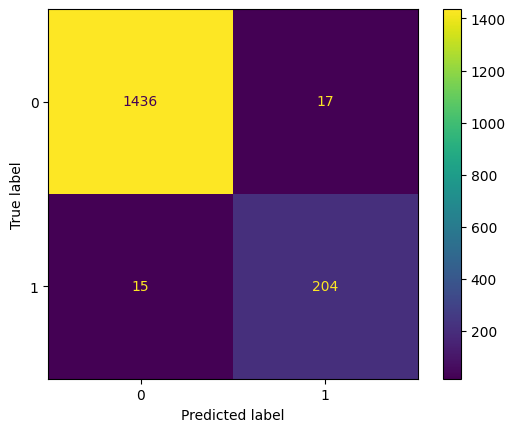

In [40]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_mn)).plot()

In [41]:
BN.fit(X_train,y_train)

BernoulliNB()

In [42]:
y_pred_bn=BN.predict(X_test)

In [43]:
accuracy_score(y_test,y_pred_bn)*100

98.14593301435407

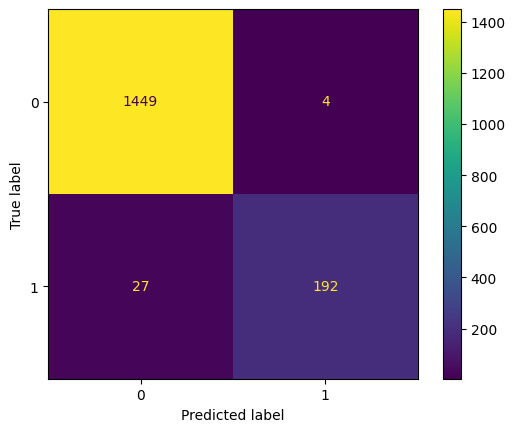

In [44]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_bn)).plot()

In [45]:
GN.fit(X_train,y_train)

GaussianNB()

In [46]:
y_pred_gn=GN.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred_gn)*100

86.18421052631578

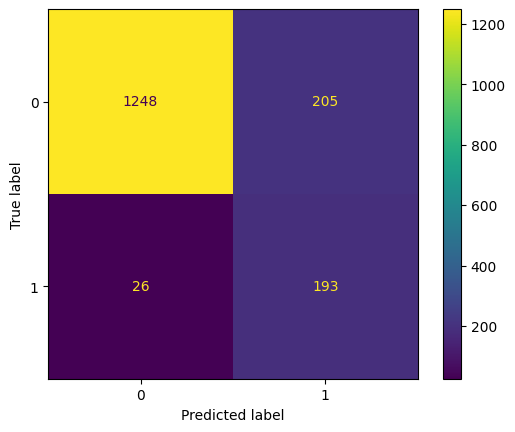

In [48]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_gn)).plot()

In [54]:
param_grid = {
'alpha': [0.1, 0.5, 1.0, 2.0],
'fit_prior': [True, False]
}

In [55]:
gs_mn = GridSearchCV(estimator=MN, param_grid=param_grid, cv=5)

In [56]:
gs_mn.fit(X, y)
best_params = gs_mn.best_params_
best_score = gs_mn.best_score_
print("Best Hyperparameters: ", best_params)
print("Best Score: ", best_score)

Best Hyperparameters:  {'alpha': 2.0, 'fit_prior': True}
Best Score:  0.9842068737873456


In [57]:
MN=MultinomialNB(alpha=1.0, fit_prior= True)

In [58]:
MN.fit(X_train,y_train)

MultinomialNB()

In [59]:
y_pred_mng=MN.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred_mng)

0.9808612440191388

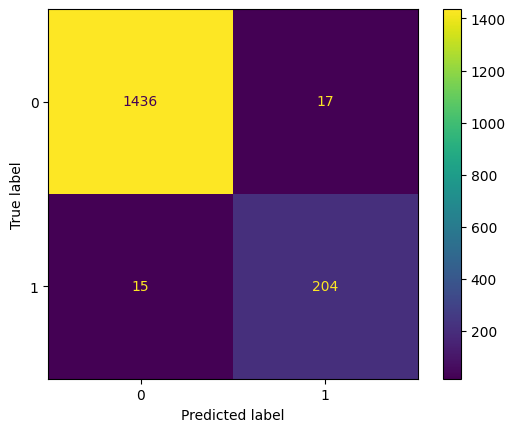

In [61]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_mng)).plot()

ANN Implementation

In [62]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks

In [63]:
model=Sequential()

In [64]:
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [65]:
model.compile(loss=losses.binary_crossentropy,
             optimizer='adam',
             metrics=['accuracy'])

In [66]:
callback = callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
verbose=1,
mode="auto", baseline=None, restore_best_weights=False
)

In [68]:
from tensorflow.keras.callbacks import Callback

class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Your custom logic here
        pass

callb = MyCallback()

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=500, callbacks=[callb])


Epoch 1/50
8/8 [==============================] - 1s 69ms/step - loss: 0.6536 - accuracy: 0.8221 - val_loss: 0.6129 - val_accuracy: 0.9217
Epoch 2/50
8/8 [==============================] - 0s 28ms/step - loss: 0.5771 - accuracy: 0.9503 - val_loss: 0.5434 - val_accuracy: 0.9408
Epoch 3/50
8/8 [==============================] - 0s 22ms/step - loss: 0.5042 - accuracy: 0.9631 - val_loss: 0.4766 - val_accuracy: 0.9533
Epoch 4/50
8/8 [==============================] - 0s 27ms/step - loss: 0.4355 - accuracy: 0.9690 - val_loss: 0.4149 - val_accuracy: 0.9611
Epoch 5/50
8/8 [==============================] - 0s 25ms/step - loss: 0.3739 - accuracy: 0.9728 - val_loss: 0.3610 - val_accuracy: 0.9653
Epoch 6/50
8/8 [==============================] - 0s 25ms/step - loss: 0.3209 - accuracy: 0.9785 - val_loss: 0.3156 - val_accuracy: 0.9683
Epoch 7/50
8/8 [==============================] - 0s 25ms/step - loss: 0.2770 - accuracy: 0.9826 - val_loss: 0.2781 - val_accuracy: 0.9719
Epoch 8/50
8/8 [===========

In [69]:
y_pred_ann=model.predict(X_test)

53/53 [==============================] - 0s 3ms/step


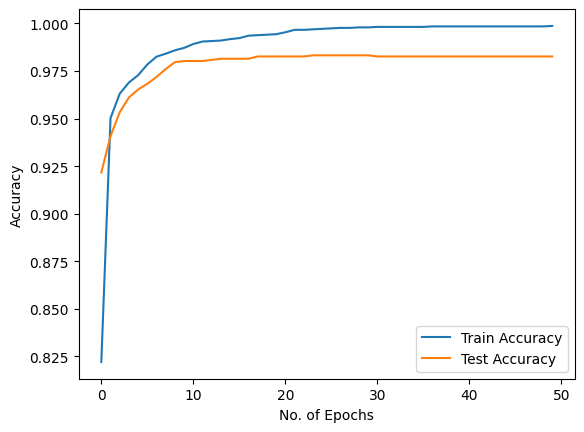

In [70]:
plt.plot(history.history['accuracy'],label="Train Accuracy")
plt.plot(history.history['val_accuracy'],label="Test Accuracy")
plt.xlabel("No. of Epochs")
plt.ylabel('Accuracy')
plt.legend()

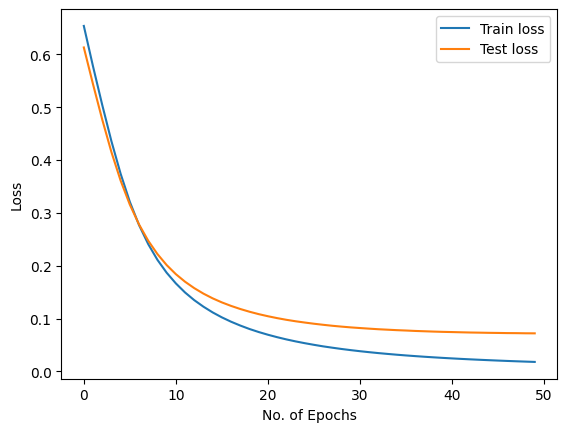

In [71]:
plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'],label="Test loss")
plt.xlabel("No. of Epochs")
plt.ylabel('Loss')
plt.legend()

In [74]:
import numpy as np
acc_ann = np.max (history.history['accuracy'])*100

In [77]:
s={
    'Model Name': ['Guassion NB', 'Multinomial NB', 'Bernoulli NB', 'ANN'],
    ' Score' :
    [accuracy_score(y_test,y_pred_gn)*100,accuracy_score(y_test,y_pred_mn)*100,accuracy_score(y_test,y_pred_bn)*100,accuracy_score(y_test,y_pred_mng)*100]
}

In [78]:
pd.DataFrame(s)

,Model Name,Score
0,Guassion NB,86.184211
1,Multinomial NB,98.086124
2,Bernoulli NB,98.145933
3,ANN,98.086124
